In [1]:
import math
import random
import time
from jupyterthemes import jtplot
jtplot.style()

import gym
gym.logger.set_level(40)
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Use CUDA</h2>

In [3]:
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")

<h2>Create Environments</h2>
16スレッドで環境を作成

In [4]:
from common.multiprocessing_env import SubprocVecEnv

num_envs = 16
env_name = "Pusher-v2"

def make_env():
    def _thunk():
        env = gym.make(env_name)
        return env

    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)

env = gym.make(env_name)

Process Process-7:


Traceback (most recent call last):


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


Process Process-6:


Traceback (most recent call last):


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 469, in <module>
    cymj = load_cython_ext(mjpro_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 69, in load_cython_ext
    _ensure_set_env_var("LD_LIBRARY_PATH", lib_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 102, in _ensure_set_env_var
    var_name, var_name, lib_path))


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 469, in <module>
    cymj = load_cython_ext(mjpro_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 69, in load_cython_ext
    _ensure_set_env_var("LD_LIBRARY_PATH", lib_path)


Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/near/.mujoco/mjpro150/bin


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 102, in _ensure_set_env_var
    var_name, var_name, lib_path))


Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/near/.mujoco/mjpro150/bin


Process Process-1:


Traceback (most recent call last):


Process Process-4:


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


Traceback (most recent call last):


Process Process-9:


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


Traceback (most recent call last):


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


Process Process-8:


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


Traceback (most recent call last):


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


Process Process-5:


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


Traceback (most recent call last):


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


Process Process-10:


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


Process Process-14:


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


Process Process-16:


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


Traceback (most recent call last):


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 469, in <module>
    cymj = load_cython_ext(mjpro_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 69, in load_cython_ext
    _ensure_set_env_var("LD_LIBRARY_PATH", lib_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


Traceback (most recent call last):


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 102, in _ensure_set_env_var
    var_name, var_name, lib_path))


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


Traceback (most recent call last):


Process Process-12:


Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/near/.mujoco/mjpro150/bin


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 469, in <module>
    cymj = load_cython_ext(mjpro_path)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 69, in load_cython_ext
    _ensure_set_env_var("LD_LIBRARY_PATH", lib_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 102, in _ensure_set_env_var
    var_name, var_name, lib_path))


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/near/.mujoco/mjpro150/bin


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


Process Process-2:


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


Process Process-3:


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


Traceback (most recent call last):


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


Traceback (most recent call last):


Traceback (most recent call last):


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 469, in <module>
    cymj = load_cython_ext(mjpro_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/git/TorchGAIL/common/multiprocessing_env.py", line 9, in worker
    env = env_fn_wrapper.x()


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 69, in load_cython_ext
    _ensure_set_env_var("LD_LIBRARY_PATH", lib_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


Process Process-13:


  File "<ipython-input-4-4ec9484a328e>", line 8, in _thunk
    env = gym.make(env_name)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 102, in _ensure_set_env_var
    var_name, var_name, lib_path))


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 469, in <module>
    cymj = load_cython_ext(mjpro_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/near/.mujoco/mjpro150/bin


Traceback (most recent call last):


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


Process Process-11:


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException


Traceback (most recent call last):


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2229, in load
    return self.resolve()


  File "/home/near/RL-a/lib/python3.6/site-packages/mujoco_py/builder.py", line 469, in <module>
    cymj = load_cython_ext(mjpro_path)


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/__init__.py", line 1, in <module>
    from gym.envs.mujoco.mujoco_env import MujocoEnv


  File "/home/near/RL-a/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2235, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  File "/home/near/RL-a/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 11, in <module>
    import mujoco_py


<h2>Neural Network</h2>
* nn.Relu→nn.Tanh

In [5]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0., std=0.1)
        nn.init.constant_(m.bias, 0.1)
        

class ActorCritic(nn.Module):
    def __init__(self, num_inputs, num_outputs, hidden_size, std=0.0):
        super(ActorCritic, self).__init__()
        
        self.critic = nn.Sequential(
            nn.Linear(num_inputs, hidden_size),
#            nn.ReLU(),
            nn.Tanh(),
            nn.Linear(hidden_size, 1)
        )
        
        self.actor = nn.Sequential(
            nn.Linear(num_inputs, hidden_size),
#            nn.ReLU(),
            nn.Tanh(),
            nn.Linear(hidden_size, num_outputs),
        )
        self.log_std = nn.Parameter(torch.ones(1, num_outputs) * std)
        
        self.apply(init_weights)
        
    def forward(self, x):
        value = self.critic(x)
        mu    = self.actor(x)
        std   = self.log_std.exp().expand_as(mu)
        dist  = Normal(mu, std)
        return dist, value

In [6]:
def plot(frame_idx, rewards, suc_rate):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, rewards[-1]))
    plt.plot(rewards)
    plt.subplot(132)
    plt.title('success_rate')
    plt.plot(suc_rate)
    plt.show()
def test_env(vis=False):
    state = env.reset()
    if vis: env.render()
    done = False
    total_reward = 0
    while not done:
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        dist, _ = model(state)
        next_state, reward, done, _ = env.step(dist.sample().cpu().numpy()[0])
        state = next_state
        if vis: 
            env.render()
            time.sleep(0.05)
        total_reward += reward
    return total_reward

<h2>GAE</h2>
* gamma 0.99→0.995 tau 0.95→0.97

In [7]:
def compute_gae(next_value, rewards, masks, values, gamma=0.99, tau=0.95):
    values = values + [next_value]
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        delta = rewards[step] + gamma * values[step + 1] * masks[step] - values[step]
        gae = delta + gamma * tau * masks[step] * gae
        returns.insert(0, gae + values[step])
    return returns

<h1> Proximal Policy Optimization Algorithm</h1>
<h2><a href="https://arxiv.org/abs/1707.06347">Arxiv</a></h2>

In [8]:
def ppo_iter(mini_batch_size, states, actions, log_probs, returns, advantage):
    batch_size = states.size(0)
    for _ in range(batch_size // mini_batch_size):
        rand_ids = np.random.randint(0, batch_size, mini_batch_size)
        yield states[rand_ids, :], actions[rand_ids, :], log_probs[rand_ids, :], returns[rand_ids, :], advantage[rand_ids, :]
        
        

def ppo_update(ppo_epochs, mini_batch_size, states, actions, log_probs, returns, advantages, clip_param=0.2):
    for _ in range(ppo_epochs):
        for state, action, old_log_probs, return_, advantage in ppo_iter(mini_batch_size, states, actions, log_probs, returns, advantages):
            dist, value = model(state)
            entropy = dist.entropy().mean()
            new_log_probs = dist.log_prob(action)

            ratio = (new_log_probs - old_log_probs).exp()
            surr1 = ratio * advantage
            surr2 = torch.clamp(ratio, 1.0 - clip_param, 1.0 + clip_param) * advantage

            actor_loss  = - torch.min(surr1, surr2).mean()
            critic_loss = (return_ - value).pow(2).mean()

            loss = 0.5 * critic_loss + actor_loss - 0.001 * entropy

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [9]:
num_inputs  = envs.observation_space.shape[0]
num_outputs = envs.action_space.shape[0]

#Hyper params:
hidden_size      = 128
lr               = 3e-4
num_steps        = 100
mini_batch_size  = 32
ppo_epochs       = 10
threshold_reward = 5000

model = ActorCritic(num_inputs, num_outputs, hidden_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [10]:
max_frames = 20000000
plot_interval = 1000
frame_idx  = 0
test_rewards = []
success_num = 0
success_rates = []

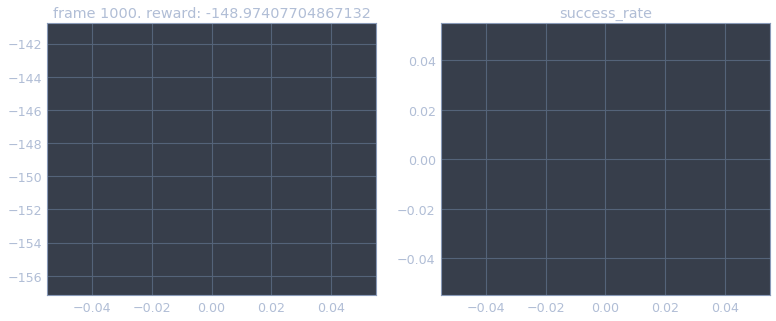

KeyboardInterrupt: 

In [11]:
state = envs.reset()
early_stop = False

while frame_idx < max_frames and not early_stop:

    log_probs = []
    values    = []
    states    = []
    actions   = []
    rewards   = []
    masks     = []
    entropy = 0

    for _ in range(num_steps):
        state = torch.FloatTensor(state).to(device)
        dist, value = model(state)

        action = dist.sample()
        next_state, reward, done, info = envs.step(action.cpu().numpy())
        achieve_reward = np.empty((num_envs, 1))
        for i,x in enumerate(info):achieve_reward[i] = [x["achieve"]]
 
        log_prob = dist.log_prob(action)
        entropy += dist.entropy().mean()
        
        log_probs.append(log_prob)
        values.append(value)
        rewards.append(torch.FloatTensor(reward).unsqueeze(1).to(device))
        masks.append(torch.FloatTensor(1 - done).unsqueeze(1).to(device))
        
        states.append(state)
        actions.append(action)
        
        state = next_state
        frame_idx += 1
        
#        if frame_idx % num_steps == 0:
#            success_num += np.sum(achieve_reward)
    success_num += np.sum(achieve_reward)
    if frame_idx % plot_interval== 0:
        test_reward = np.mean([test_env() for _ in range(10)])
        test_rewards.append(test_reward)
        success_rates.append(success_num/(num_envs*(plot_interval/num_steps)))
        plot(frame_idx, test_rewards, success_rates)
        success_num = 0
        if test_reward > threshold_reward: early_stop = True
    next_state = torch.FloatTensor(next_state).to(device)
    _, next_value = model(next_state)
    returns = compute_gae(next_value, rewards, masks, values)

    returns   = torch.cat(returns).detach()
    log_probs = torch.cat(log_probs).detach()
    values    = torch.cat(values).detach()
    states    = torch.cat(states)
    actions   = torch.cat(actions)
    advantage = returns - values
    
    ppo_update(ppo_epochs, mini_batch_size, states, actions, log_probs, returns, advantage)

<h1>Saving trajectories for GAIL</h1>

In [ ]:
test_env(True)

In [12]:
from itertools import count

max_expert_num = 50000
num_steps = 0
expert_traj = []
sum_reward = 0
success_num = 0
for i_episode in count():
    state = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        dist, _ = model(state)
        action = dist.sample().cpu().numpy()[0]
        next_state, reward, done, info = env.step(action)
        state = next_state
        total_reward += reward
        expert_traj.append(np.hstack([state, action]))
        num_steps += 1
    sum_reward += total_reward
    success_num += info["achieve"]
    print("episode:", i_episode, "reward:", total_reward)
    
    if num_steps >= max_expert_num:
        break
        
expert_traj = np.stack(expert_traj)
print()
print(expert_traj.shape)
print("sampled:",i_episode+1,"mean_reward:",sum_reward/(i_episode+1),"success_rate:",success_num/(i_episode+1))
np.save("expert_traj.npy", expert_traj)

episode: 0 reward: -152.75984214833295
episode: 1 reward: -163.98071384420572
episode: 2 reward: -147.91589183822563
episode: 3 reward: -141.85844085804908
episode: 4 reward: -149.87199080753666
episode: 5 reward: -139.8320496147164
episode: 6 reward: -130.01598398071363
episode: 7 reward: -148.80867871313436
episode: 8 reward: -143.27881265149347
episode: 9 reward: -157.54674783724874
episode: 10 reward: -151.45881326475882
episode: 11 reward: -145.94865671327477
episode: 12 reward: -151.91703867348633
episode: 13 reward: -142.7956025590396
episode: 14 reward: -139.80931419596502
episode: 15 reward: -151.96650980686792
episode: 16 reward: -144.52002041973765
episode: 17 reward: -139.50468082543065
episode: 18 reward: -167.1400071845581
episode: 19 reward: -145.8557244826802
episode: 20 reward: -143.73619016951312
episode: 21 reward: -142.02390906184857
episode: 22 reward: -161.59747289267938
episode: 23 reward: -141.7635723548118
episode: 24 reward: -140.72594332587764
episode: 25 rew

In [ ]:
            from IPython.core.debugger import Pdb; Pdb().set_trace()

### ex_traj_Pusher_PPO_TorchGAIL_500
sampled: 500 mean_reward: -26.717197505464732 success_rate: 0.848

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.

8

In [ ]:
env.